In [1]:
from sparrow import protein
from sparrow import io 

import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)


In [4]:
viable = io.read_fasta('data/viable_orthologs.fasta')
inviable = io.read_fasta('data/inviable_orthologs.fasta')

In [5]:
all_data = {}
for d in inviable:
    all_data[d] = inviable[d]
for d in viable:
    all_data[d] = viable[d]

In [6]:
ordered_names = ['Egossypi [INVIABLE]', 'Klactis [INVIABLE]', 
                 'Lkluyver [INVIABLE]', 'Lthermot [INVIABLE]', 
                 'Lwaltii [INVIABLE]', 'Tdelbrue [VIABLE]', 
                 'Zrouxii [INVIABLE]', 'Tblattae [INVIABLE]',
                 'Tetrapisispora_phaffii [VIABLE]', 'Vpolyspo [INVIABLE]',
                 'Knaganis [INVIABLE]', 'Kafrican [INVIABLE]',
                 'Ndairene [INVIABLE]', 'Ncastell [INVIABLE]',
                 'Candida_glabrata [INVIABLE]', 'Smikatae [VIABLE]',
                 'Skudriav [VIABLE]', 'Suvarum [VIABLE]', 'WT_IDR2']


In [7]:
negative = []
positive = []
hydrophobic = []
polar = []
names = []
for i in ordered_names:
    polar.append(all_data[i].fraction_polar)
    negative.append(all_data[i].fraction_negative)
    positive.append(all_data[i].fraction_positive)
    hydrophobic.append(all_data[i].amino_acid_fractions['L'] + all_data[i].amino_acid_fractions['I'] + all_data[i].amino_acid_fractions['V'] + all_data[i].amino_acid_fractions['M'] + all_data[i].fraction_aromatic )
    names.append(i[0:8])
    

neg_filler = []
pos_filler = []
hydro_filler = []

for i in negative:
    neg_filler.append(max(negative)-i)

for i in positive:
    pos_filler.append(max(positive)-i)

for i in hydrophobic:
    hydro_filler.append(max(hydrophobic)-i)
    
    


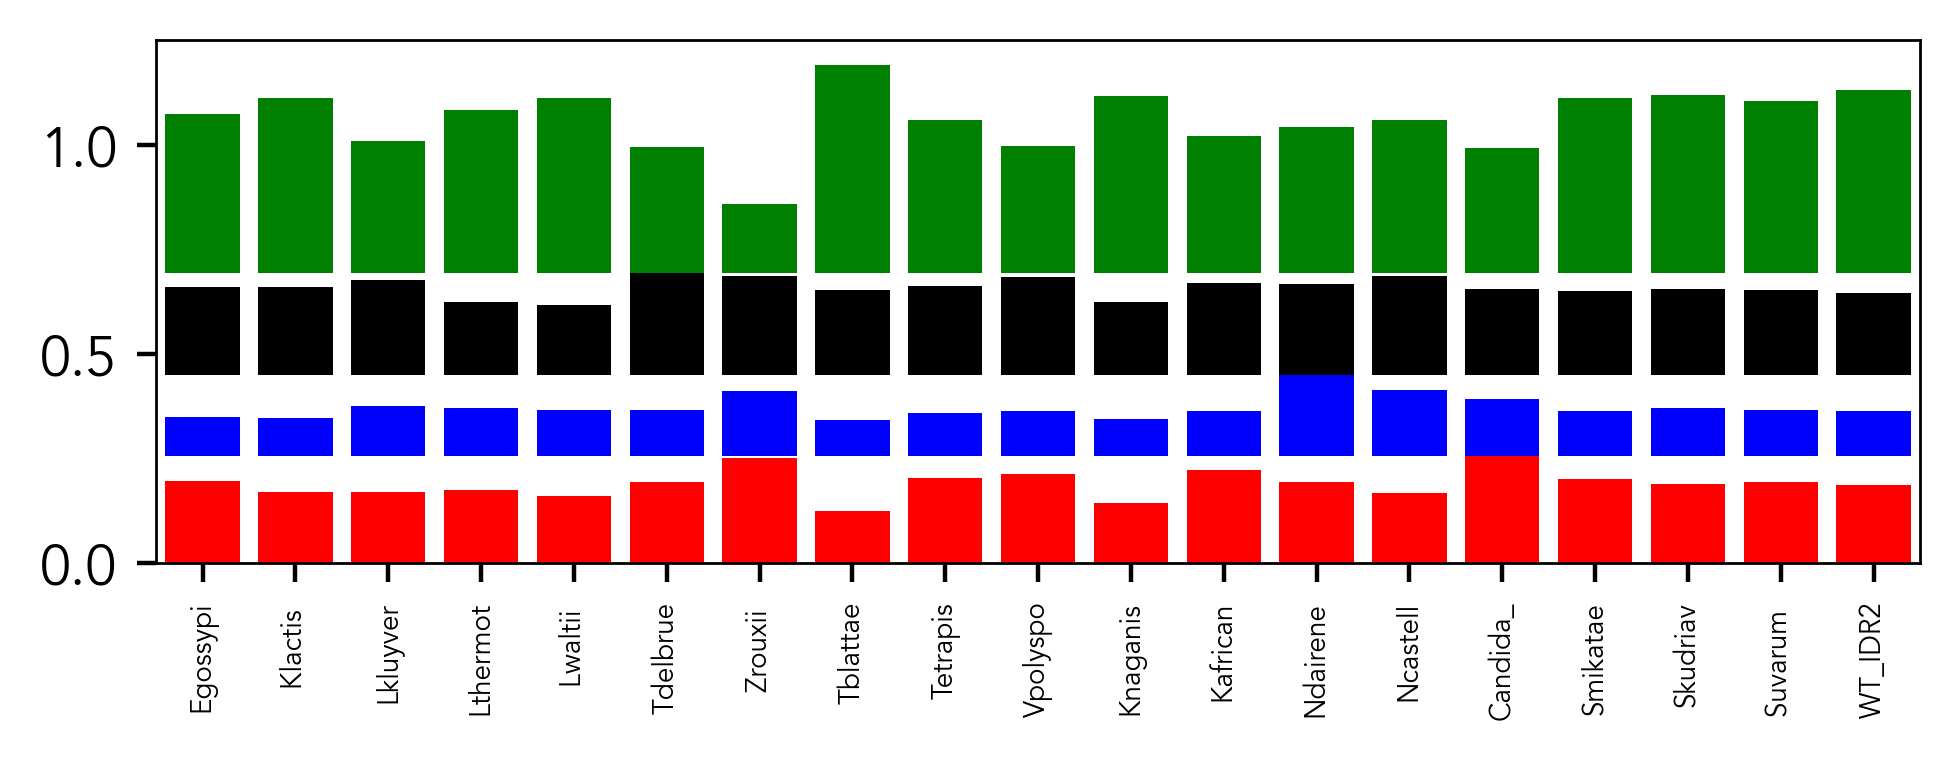

In [8]:
figure(num=None, figsize=(5, 2), dpi=200, facecolor='w', edgecolor='k')
ax = plt.gca()




    

found=False

# The position of the bars on the x-axis
r = np.arange(1,len(negative)+1)

idx=0
colors={}
colors[0] = 'red'
colors[1] = 'white'
colors[2] = 'blue'
colors[3] = 'white'
colors[4] = 'black'
colors[5] = 'white'
colors[6] = 'green'
running_total = np.array([0]*len(negative))

for bars in [negative, neg_filler, positive, pos_filler, hydrophobic, hydro_filler, polar]:

    if found:        
        plt.bar(r, bars, bottom=running_total, color=colors[idx], edgecolor='white', width=0.8,linewidth=0)
        
        
    else:
        plt.bar(r, bars, color=colors[idx], edgecolor='white', width=0.8, linewidth=0)
        found = True
        
    running_total = bars + running_total
    idx = idx + 1
    
plt.xticks(r,names, rotation=90, fontsize=5)
plt.tight_layout()
plt.xlim([0.5,19.5])
plt.savefig('figures/ortholog_compposition_all.pdf')